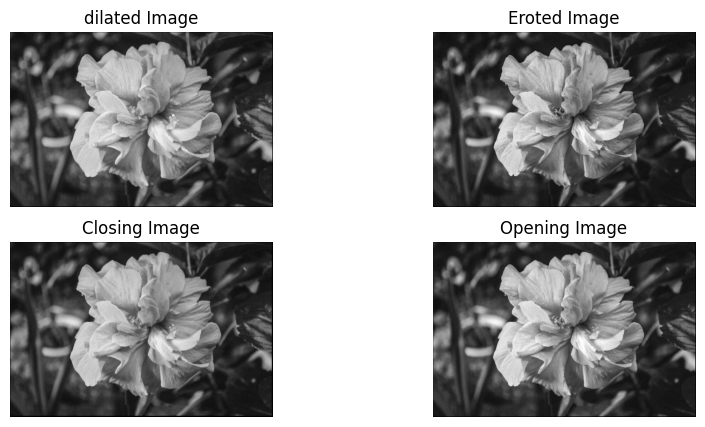

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
def loadImage(name,size=None):
    image=Image.open(name).convert("L")
    if size!=None:
        image=image.resize(size)
    return np.array(image)

def imshow(image):
    img=plt.imshow(image, cmap="gray")
    plt.axis('off')
 
image=loadImage("input_images/img6.jpg")

# structuring elm
kernel = np.ones((10,10), np.uint8) 
h, w = image.shape



dilated_image = np.zeros_like(image)
eroded_image = np.zeros_like(image)
closing = np.zeros_like(image)

# dilation
for i in range(2, h-7):
    for j in range(2, w-7):
        max_val = np.max(image[i-2:i+8, j-2:j+8] * kernel)
        dilated_image[i, j] = max_val

#erosion
for i in range(2, h-7):
    for j in range(2, w-7):
        min_val = np.min(image[i-2:i+8, j-2:j+8] * kernel)
        eroded_image[i, j] = min_val


#Closing
dilation = np.zeros_like(image)
h, w = image.shape
for i in range(2, h-7):
    for j in range(2, w-7):
        max_val = np.max(image[i-2:i+8, j-2:j+8] * kernel)
        dilation[i, j] = max_val
        
for i in range(2, h-7):
    for j in range(2, w-7):
        min_val = np.min(dilation[i-2:i+8, j-2:j+8] * kernel)
        closing[i, j] = min_val

        
#Opening
#erosion
erosion = np.zeros_like(image)
for i in range(2, h-7):
    for j in range(2, w-7):
        min_val = np.min(image[i-2:i+8, j-2:j+8] * kernel)
        erosion[i, j] = min_val

# dilation
opening = np.zeros_like(image)
for i in range(2, h-7):
    for j in range(2, w-7):
        max_val = np.max(erosion[i-2:i+8, j-2:j+8] * kernel)
        opening[i, j] = max_val


plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(dilated_image, cmap='gray')
plt.title('dilated Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroted Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(closing, cmap='gray')
plt.title('Closing Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(opening, cmap='gray')
plt.title('Opening Image')
plt.axis('off')

plt.show()
#imshow(dilated_image)
#imshow(eroded_image)
#imshow(closing)